Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8773 - loss: 0.4273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9646 - loss: 0.1167
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9779 - loss: 0.0752
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9834 - loss: 0.0568
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9876 - loss: 0.0410
313/313 - 1s - 2ms/step - accuracy: 0.9783 - loss: 0.0742

Test accuracy: 0.9783
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


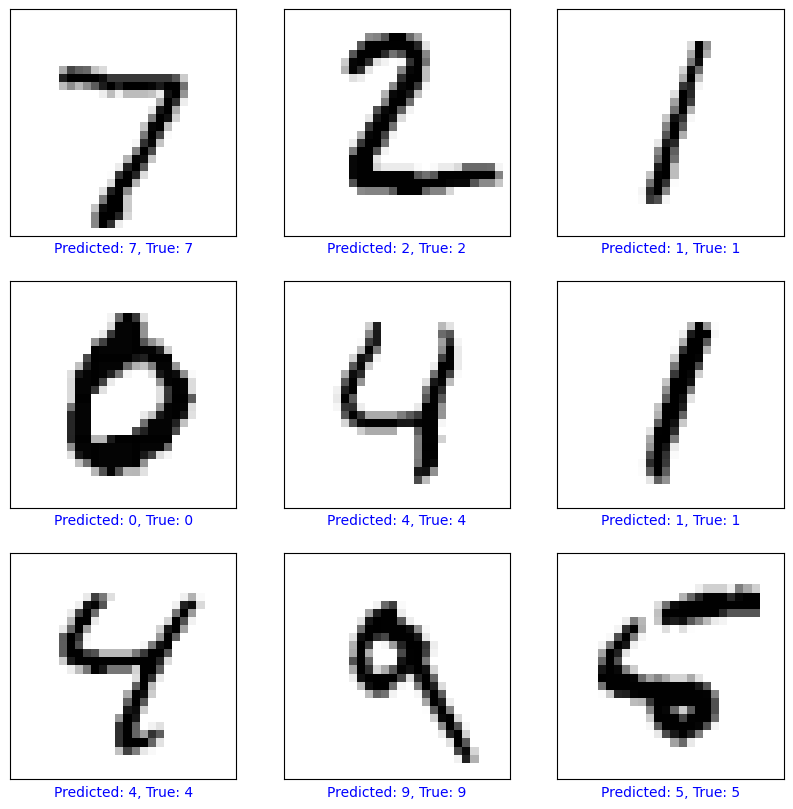

In [ ]:
#tensorflow and keras → Used to build and train the neural network model.
import tensorflow as tf
from tensorflow import keras

#numpy → Handles numerical operations and array manipulations.
import numpy as np

#matplotlib.pyplot → Used to visualize sample predictions.
import matplotlib.pyplot as plt

# Load the MNIST dataset (handwritten digits 0-9)
#x_train, y_train → Training images and labels.
#x_test, y_test → Testing images and labels.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1] range for better training
#Divides all pixel values by 255 (since pixel values range from 0 to 255)
x_train, x_test = x_train / 255.0, x_test / 255.0


# Define the neural network model
#Sequential Model → A linear stack of layers.
model = keras.Sequential([
#Flatten(input_shape=(28, 28)) → Converts 2D images (28×28)
#into a 1D vector (784 values).
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 1D

#Hidden Layer (Dense(128, activation='relu'))
#128 neurons with ReLU (Rectified Linear Unit) activation.
#ReLU speeds up learning by removing negative values.
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons

#10 neurons (one for each digit 0-9).
#Uses softmax activation to output probabilities for each digit.
    keras.layers.Dense(10, activation='softmax') # Output layer (10 classes)
])


# Compile the model
#adam optimizer → Efficient optimizer for training deep learning models.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
#epochs=5 → The model goes through the entire dataset 5 times
#During training, the model adjusts weights to minimize loss and improve accuracy.
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on test data
#model.evaluate(x_test, y_test) → Tests the model on unseen data.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}") #test_acc → Accuracy of the model on the test set.


# Make predictions
#model.predict(x_test) → Predicts class probabilities for each test image.
predictions = model.predict(x_test)

# Plot some predictions
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

     #cmap=plt.cm.binary → Displays images in grayscale.
    plt.imshow(img, cmap=plt.cm.binary)

    #np.argmax(predictions_array) → Gets the predicted digit.
    predicted_label = np.argmax(predictions_array)
    true_label = true_label[i]

    #Color coding
    if predicted_label == true_label:
        color = 'blue' #Blue → If prediction is correct.
    else:
        color = 'red' #Red → If prediction is wrong.
    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}", color=color)

# Display a few sample predictions
num_rows, num_cols = 3, 3
plt.figure(figsize=(10, 10))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)

    #Calls plot_image() to display each image with predicted and true labels.
    plot_image(i, predictions[i], y_test, x_test[i])
plt.show()